# Playing with Real Quantum Computers in Qiskit

**Quick reference guide to accessing real quantum computers in Qiskit**


This notebook demonstrates a way to access a real quantum device using Qiskit, and multiple ways of achieving the same thing where applicable. This is meant to be an easy lookup tool that supplements educational material.

I'll assume you have prior knowledge of quantum circuits and basic Qiskit.

If you aren't familiar with any of these, please see the following resources:
- [Qiskit Textbook](https://qiskit.org/textbook)
- [Qiskit Textbook: Lab 1. Quantum Circuits](https://qiskit.org/textbook/ch-labs/Lab01_QuantumCircuits.html)
- [Qiskit Documentation: qiskit.circuit](https://qiskit.org/documentation/apidoc/circuit.html)

*Click [here](https://nbviewer.org/github/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Real_Quantum_Computers_in_Qiskit.ipynb) to view this notebook in nbviewer*

In [ ]:
# run this cell if you're executing this notebook in your browser
!pip install qiskit

from IPython.display import clear_output
clear_output()

In [1]:
from qiskit import *


## Load Account

In order to choose which real device you want to play with, you first need to load your account and view which providers you have access to. 

If you need to save new credentials on your disk or overwrite previously saved credentials, retrieve your API token from [quantum-computing.ibm.com](https://quantum-computing.ibm.com/).


In [2]:
from qiskit import IBMQ

# IBMQ.save_account('APITOKEN', overwrite=True) ## Uncomment and replace APITOKEN with your API token to save new credentials
IBMQ.load_account()
IBMQ.providers()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

This example shows access to the 'ibm-q' provider.

Note: You can also see a list of providers you have access to by going to your account on [quantum-computing.ibm.com](https://quantum-computing.ibm.com/) > View account details > Providers

## Get Provider with get_provider() and View Available Backends

In [5]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila


Backends that don't have the word 'simulator' in their names are real devices! 

## Select Device Based on Conditions

### Method 1: Manually choose backend using information from jupyter widget


In [6]:
import qiskit.tools.jupyter 

In [20]:
backend = provider.get_backend('ibmq_manila') # replace ibmq_manila with whatever backend you want information on
backend 

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

(Note: you need to run the cell in order to view the widget.)

As you can see you get all sorts of nifty details like the number of qubits, how many pending jobs there currently are, quantum volume, etc.


Here's something for you to try: which backend has only one qubit?

### Method 2: Apply filters and use least_busy

If you require a real device and not a simulator, and if you require more than, say, 3 qubits for your circuit, you can apply filters to select a device that is real and large enough.

In [21]:
eligible_devices = provider.backends(filters=lambda x:x.configuration().n_qubits>3 and not x.configuration().simulator)

for backend in eligible_devices:
    print(backend)

ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
ibmq_manila


Out of all the devices that fit your criteria, you probably want the one that's currently the least busy. Unless you want an excuse to buy you some time!

In [24]:
from qiskit.providers.ibmq import least_busy

chosen_backend = least_busy(eligible_devices)
print(chosen_backend.name())

ibmq_bogota


## View Gate Map

If you want to see the connectivity of the qubits on the device, look at its gate map.

### Method 1: Jupyter Widget

The configuration tab in the jupyter widget we saw earlier depicts the gate map.

In [25]:
chosen_backend

<IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>

### Method 2: Using plot_gate_map

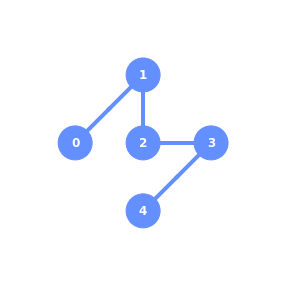

In [37]:
from qiskit.visualization import plot_gate_map

plot_gate_map(chosen_backend, plot_directed = False) # toggle plot_directed and see what happens

## View Error Map

If you need the latest noise information for a device, look at its error map.

### Method 1: Jupyter Widget

Click on the error map tab in the widget we looked at above!

### Method 2: Using plot_error_map

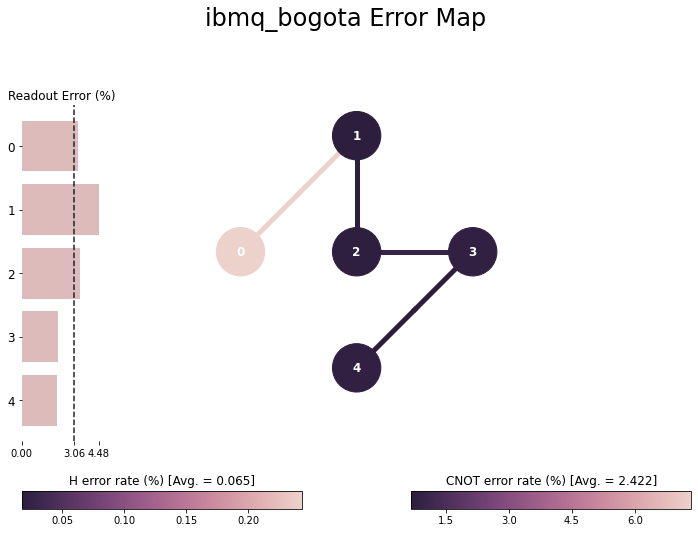

In [36]:
from qiskit.visualization import plot_error_map

plot_error_map(chosen_backend) 

## Run a Circuit on a Real Quantum Computer

Now that we've selected a backend, we can conduct an experiment with a circuit!


### Prepare Your Circuit
First we need a circuit. Let's build a circuit that generates this Bell state:

$\left|\psi^-\right\rangle = \frac{1}{\sqrt{2}}(\left|01\right\rangle - \left|10\right\rangle)$


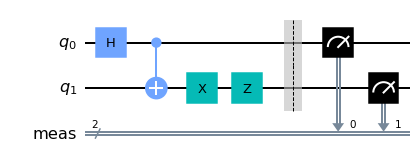

In [40]:
qc_bell = QuantumCircuit(2)

qc_bell.h(0)
qc_bell.cx(0,1)
qc_bell.x(1)
qc_bell.z(1)
qc_bell.measure_all()

display(qc_bell.draw('mpl'))

### Execute and Monitor Your Job

In [41]:
from qiskit.tools import job_monitor

job = execute(qc_bell, chosen_backend)
job_monitor(job)

Job Status: job has successfully run


You can save your job's id to retrieve it later on.

In [43]:
job_id = job.job_id()

Retrieve your result with the job id.

In [47]:
retrieved_job = chosen_backend.retrieve_job(job_id)
result = retrieved_job.result()
counts_real = result.get_counts()
print(counts_real)

{'00': 282, '01': 1741, '10': 1850, '11': 127}


## Compare Real vs. Simulated Results

Since real quantum computers are not fault tolerant, i.e., they are noisy, the results you get from a real quantum computer are a little different from what you would expect. 

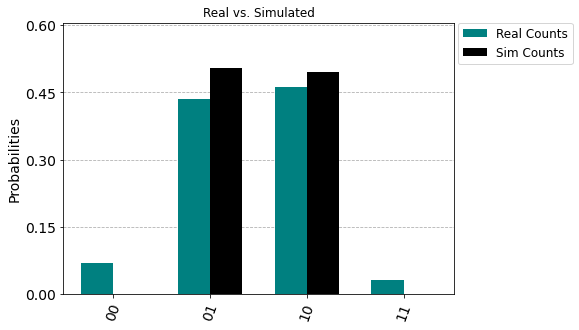

In [46]:
from qiskit.visualization import plot_histogram

sim_backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc_bell, sim_backend)
counts_sim = job_sim.result().get_counts()

title = 'Real vs. Simulated'
legend = ['Real Counts', 'Sim Counts']

plot_histogram([counts_real, counts_sim], legend = legend, title = title, color = ['teal', 'black'], bar_labels = False)

## More to Explore

- [Qiskit Textbook: Lab 1. Quantum Circuits](https://qiskit.org/textbook/ch-labs/Lab01_QuantumCircuits.html)
- [How I Use Quantum Computing to Create Bubble Art](https://medium.com/qiskit/how-i-use-quantum-computing-to-create-bubble-art-d6c01f3ec2e) (a fun intro to quantum noise)
- [Playing with Quantum Circuits in Qiskit](https://github.com/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Quantum_Circuits_in_Qiskit.ipynb)
- [Playing with Quantum States in Qiskit](https://github.com/quantum-kittens/quantum-computing-basics/blob/master/Qiskit_Reference_Guides/Playing_with_Quantum_States_in_Qiskit.ipynb)

Created by quantum-kittens